# code ok
# TODO: write paragraphs for fairness analysis

- spiegare bene questione anno (oppure nella parte di exploratory?)

In [1]:
import sys
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-13.2.1-arm64-arm-64bit
Tensor Flow Version: 2.12.0
Keras Version: 2.12.0

Python 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:12:31) [Clang 14.0.6 ]
Pandas 2.1.1
Scikit-Learn 1.3.1
GPU is available


In [2]:
import seaborn as sns
sns.set_context('notebook')

# MODIFICATO E TOLTO YEAR

# TODO:

1. def in altro file
2. parte introduttiva sistemare
3. risultati (nel lavoro di gruppo la scelta era stata abbastanza approssimativa, no criterio)
4. **ripetere tutto solo con Year o solo con NoteDate**

In [3]:
# IMPORTING STATEMENTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import mutual_information_regression as mri
import helper_functions_fs as hf

In [4]:
data = pd.read_csv('../0_data/train.csv', index_col=0)
data.head()

,InterestRate,MinorityRatio,CensusTractMedFamIncome,MonthlyIncome,HUDMedIncome,LTV,PaymentCount,Age1,Age2,HousingExpense,...,State_31,State_39,State_42,State_48,State_55,State_infrequent_sklearn,Minority_Min,Minority_Missing,Minority_White,Borrower2Dummy
170846,3.750,5.631,96500,4693,69400,72.0,360,65,61,21.76,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
154335,4.375,5.745,93258,3194,94200,79.0,360,34,0,30.74,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
145818,2.750,21.300,82260,6344,81700,99.0,360,32,56,27.87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
94035,3.375,4.000,71172,9776,76700,80.0,360,25,25,9.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
175348,4.250,8.000,65755,3800,73100,80.0,360,30,0,12.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189079 entries, 170846 to 61714
Data columns (total 74 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   InterestRate                     189079 non-null  float64
 1   MinorityRatio                    189079 non-null  float64
 2   CensusTractMedFamIncome          189079 non-null  int64  
 3   MonthlyIncome                    189079 non-null  int64  
 4   HUDMedIncome                     189079 non-null  int64  
 5   LTV                              189079 non-null  float64
 6   PaymentCount                     189079 non-null  int64  
 7   Age1                             189079 non-null  int64  
 8   Age2                             189079 non-null  int64  
 9   HousingExpense                   189079 non-null  float64
 10  DebtExpense                      189079 non-null  float64
 11  PMI                              189079 non-null  float64
 12  Cre

In [6]:
data.drop(['Borrower2Dummy', 'Bank_infrequent_sklearn', 'LoanPurpose_6','MortgageType_infrequent_sklearn', 
           'Gender1_2', 'Gender2_2', 'PropertyType_infrequent_sklearn', 'Race1_infrequent_sklearn', 'Minority2_White', 
           'Race2_infrequent_sklearn','State_infrequent_sklearn', 'Minority_White'
          ], axis=1, inplace=True)

# Feature selection: the main drivers of interest rates 




In [7]:
X = data.reset_index(drop=True).copy()

y = X.pop('InterestRate').astype(float)

# X = X_sel.drop(['InterestRate'], axis='columns')#, 'Age2', 'CreditScore2', 'Gender2', 'Minority2', 'Race2'], axis='columns')

In [8]:
all_labels = list(X.columns)
results = pd.DataFrame(index=all_labels)

# SCALING: STANDARDIZATION

### ONLY NUMERICAL VARS


In [9]:
numerical = pd.read_csv('../0_data/numerical.csv', index_col=0)

In [10]:
# separate numerical and dummies

X_num = pd.concat([X.pop(col) for col in list(numerical.iloc[1:,0])], axis=1)
X['BorrowerCount'] = X['BorrowerCount']-1

#X_test_num = pd.concat([X_test.pop(col) for col in list(numerical.iloc[1:,0])], axis=1)
#X_test['BorrowerCount'] = X_test['BorrowerCount']-1

In [11]:
X_num.head()

,MinorityRatio,CensusTractMedFamIncome,MonthlyIncome,HUDMedIncome,LTV,PaymentCount,Age1,Age2,HousingExpense,DebtExpense,PMI,CreditScore1,CreditScore2,NoteDate,NoteAmount
0,5.631,96500,4693,69400,72.0,360,65,61,21.76,41.21,0.0,2,2,2019,146000
1,5.745,93258,3194,94200,79.0,360,34,0,30.74,42.45,0.0,5,9,2019,129000
2,21.300,82260,6344,81700,99.0,360,32,56,27.87,34.72,0.0,3,4,2020,311258
3,4.000,71172,9776,76700,80.0,360,25,25,9.00,10.00,0.0,5,5,2020,130000
4,8.000,65755,3800,73100,80.0,360,30,0,12.00,23.00,0.0,4,9,2019,72000


In [12]:
X.head()

,BorrowerCount,FirstTime,SelfEmployed,Bank_Boston,Bank_Chicago,Bank_Cincinnati,Bank_Dallas,Bank_Des Moines,Bank_Indianapolis,Bank_Pittsburgh,...,State_26,State_27,State_29,State_31,State_39,State_42,State_48,State_55,Minority_Min,Minority_Missing
0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from sklearn.preprocessing import StandardScaler
# scale numerical vars 
ss = StandardScaler()
X_train_num = ss.fit_transform(X_num)
#X_test_num = ss.transform(X_test_num)
X_num = pd.DataFrame(X_train_num, columns=list(numerical.iloc[1:,0]))
#X_test_num = pd.DataFrame(X_test_num, columns=list(numerical.iloc[1:,0]))
X_num.describe()

,MinorityRatio,CensusTractMedFamIncome,MonthlyIncome,HUDMedIncome,LTV,PaymentCount,Age1,Age2,HousingExpense,DebtExpense,PMI,CreditScore1,CreditScore2,NoteDate,NoteAmount
count,1.890790e+05,1.890790e+05,1.890790e+05,1.890790e+05,1.890790e+05,1.890790e+05,1.890790e+05,1.890790e+05,1.890790e+05,1.890790e+05,1.890790e+05,1.890790e+05,1.890790e+05,1.890790e+05,1.890790e+05
mean,-2.335544e-16,4.329118e-17,6.898592e-17,-1.819958e-16,6.964825e-16,2.689164e-16,-2.288664e-16,4.235170e-17,1.323913e-16,6.650381e-16,3.112493e-17,2.442832e-16,2.375942e-16,2.158467e-14,-4.906427e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-9.829129e-01,-2.968603e+00,-1.541693e+00,-3.136269e+00,-8.617748e-01,-3.667909e+00,-2.003581e+00,-1.101219e+00,-2.410365e+00,-3.148844e+00,-4.158231e-01,-4.275040e+00,-2.317892e+00,-7.010553e+00,-1.761821e+00
25%,-6.899229e-01,-6.907823e-01,-6.998868e-01,-6.839963e-01,-8.617748e-01,-2.778056e-01,-8.066413e-01,-1.101219e+00,-7.202951e-01,-7.560665e-01,-4.158231e-01,-5.143845e-01,-5.737875e-01,-1.000778e+00,-7.500204e-01
50%,-3.806037e-01,-2.074440e-01,-2.267679e-01,-6.296614e-02,-9.168695e-02,5.697203e-01,-1.333627e-01,1.920703e-01,-1.531912e-01,8.581993e-03,-4.158231e-01,7.391671e-01,-5.737875e-01,2.011766e-01,-2.017936e-01
75%,2.836096e-01,5.193869e-01,4.021168e-01,5.102925e-01,1.650090e-01,5.697203e-01,6.895334e-01,7.761363e-01,5.862923e-01,7.836339e-01,-4.158231e-01,7.391671e-01,1.170317e+00,1.403131e+00,5.519377e-01
max,3.195775e+00,4.143399e+00,3.701777e+00,3.949844e+00,5.170580e+00,5.697203e-01,3.981118e+00,2.862086e+00,4.372398e+00,5.361121e+00,7.908332e+00,7.391671e-01,1.170317e+00,1.403131e+00,4.433948e+00


In [14]:
# merge back together numerical and dummies
X = pd.concat([X, X_num], axis=1, ignore_index=False)#, columns=[X.columns]+list(numerical.iloc[1:,0]))
#X_test = pd.concat([X_test, X_test_num], axis=1,ignore_index=True)

In [15]:
X

,BorrowerCount,FirstTime,SelfEmployed,Bank_Boston,Bank_Chicago,Bank_Cincinnati,Bank_Dallas,Bank_Des Moines,Bank_Indianapolis,Bank_Pittsburgh,...,PaymentCount,Age1,Age2,HousingExpense,DebtExpense,PMI,CreditScore1,CreditScore2,NoteDate,NoteAmount
0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.569720,1.512429,1.443640,0.307737,1.138389,-0.415823,-3.021488,-1.881866,-1.000778,-0.677461
1,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.569720,-0.806641,-1.101219,1.429453,1.267391,-0.415823,0.739167,1.170317,-1.000778,-0.814518
2,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.569720,-0.956259,1.235045,1.070954,0.463210,-0.415823,-1.767936,-1.009814,0.201177,0.654875
3,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.569720,-1.479920,-0.058244,-1.286150,-2.108506,-0.415823,0.739167,-0.573787,0.201177,-0.806455
4,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.569720,-1.105876,-1.101219,-0.911412,-0.756066,-0.415823,-0.514385,1.170317,-1.000778,-1.274061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189074,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.569720,0.614725,0.859574,-0.985110,1.531637,2.785775,-0.514385,-1.009814,-1.000778,0.366589
189075,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.569720,-0.507406,0.484103,-0.893924,-1.587297,-0.415823,0.739167,-0.573787,1.403131,1.138540
189076,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.569720,-1.554729,-0.099963,-0.986359,-0.797680,-0.415823,-0.514385,-1.009814,1.403131,-0.931419
189077,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.569720,-0.657024,0.567541,3.133263,1.758431,-0.415823,-1.767936,-1.445840,-1.000778,-0.201794


In [16]:
# dependent variables
ss_y = StandardScaler()
y = ss_y.fit_transform(np.array(y).reshape(-1, 1))
#y_test = ss_y.transform(np.array(y_test).reshape(-1, 1))
pd.Series(y.flatten()).describe()

count    1.890790e+05
mean    -1.981173e-16
std      1.000003e+00
min     -2.684678e+00
25%     -7.623710e-01
50%     -1.856790e-01
75%      5.832437e-01
max      4.427857e+00
dtype: float64

In [17]:
y = y.ravel()

## 1. Mutual Information Regression


In [18]:
mi_scores = mri.make_mi_scores(X, y)

In [19]:
def plot_mi_scores(scores, namevar='Interest Rate'):
    f, ax = plt.subplots(figsize=(8, 17))
    scores = scores.sort_values(ascending=True)
    width = range(len(scores))
    
    ticks = list(scores.index)
    ax.set_ylim(0, len(scores))
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    #ax.xaxis.grid(True)
    plt.title("Mutual Information Scores: " + str(namevar))
    plt.savefig('MRI_scaled.png', bbox_inches='tight')

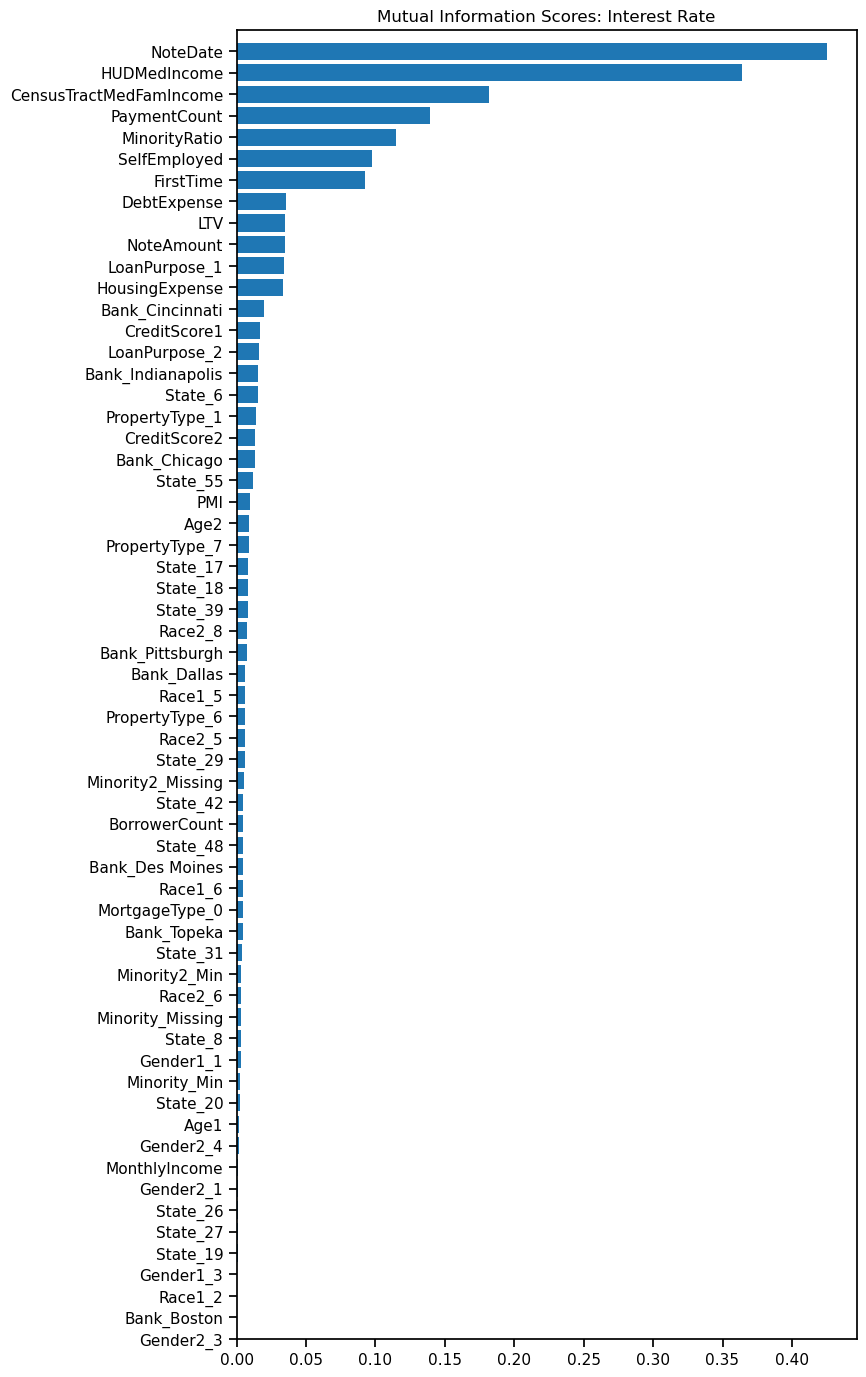

In [20]:
plot_mi_scores(mi_scores)

In [21]:
# 10 highest mutual information scores
mi_scores[:10]

NoteDate                   0.425299
HUDMedIncome               0.363707
CensusTractMedFamIncome    0.181806
PaymentCount               0.138971
MinorityRatio              0.114655
SelfEmployed               0.097886
FirstTime                  0.092774
DebtExpense                0.035487
LTV                        0.035191
NoteAmount                 0.035055
Name: MI Scores, dtype: float64

In [22]:
hf.save_selected(features = mi_scores[:5].index, name_model = 'MIR_5', all_labels=all_labels, results=results)
hf.save_selected(features = mi_scores[:10].index, name_model = 'MIR_10', all_labels=all_labels, results=results)

## Excluding 2nd borrower

From the results of the Mutual Information regressor, it seems clear that those variables related to the second borrower on a given loan are not extremely correlated with interest rates. 

Therefore, we exclude variables related to the second borrower for 2 main reasons. Firstly, we believe it is unlikely that the additional borrower might have such an important impact of the determination of an individual's credit score. Nonetheless, we will keep the dummy indicating whether a second borrower is present or not since this might have some impact. Secondly, only 60% of observations have an additional borrower, therefore the informational content is missing for a large part of the observations. 

In [24]:
X = X.drop(['Age2', 'CreditScore2', 'Gender2_1',
            'Gender2_3', 'Gender2_4', 'Minority2_Min', 'Minority2_Missing', 
             'Race2_5', 'Race2_6', 'Race2_8',
            ], axis='columns')

# 2. K-fold analysis with Select K Best



In [25]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

In [26]:
n_splits=10
kbest=10

In [27]:
def k_fold_select_K_Best(n_splits, kbest, results=results):
    results_folds = pd.DataFrame(index=all_labels, columns=[i for i in range(n_splits)])
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    kf.get_n_splits(X)

    for i, (_, test_index) in enumerate(kf.split(X,y)):
        #print(f"\nFold {i}:   n of observations = {len(test_index)}")

        # filtering selected indices 
        fold = X.loc[test_index,:]
        y_fold = y[test_index]
        # rescaling 
        ss= StandardScaler()
        fold_trans = ss.fit_transform(fold)
        fold_trans = pd.DataFrame(fold_trans, columns=X.columns)
        # feature selection
        selector = SelectKBest(f_regression, k=kbest)
        selector.fit_transform(fold_trans,y_fold)
        selected = selector.get_feature_names_out()
        #print(selected)
        hf.save_selected(features = selected, name_model = i, all_labels=all_labels, results=results_folds)

    selected_tot = []
    for r in results_folds.iterrows():
        s = sum(r[1].values)
        if s >= n_splits/2:
            #print(s)
            selected_tot.append(r[0])

    hf.save_selected(features = selected_tot, name_model = str(kbest)+'best_folds', all_labels=all_labels, results=results)
    #return results

In [28]:
k_fold_select_K_Best(n_splits=5, kbest=5)
k_fold_select_K_Best(n_splits=10, kbest=10)

In [29]:
results.style.applymap(hf.format_df_green)

/var/folders/p_/77946ggd5fs5m05m058z3hp40000gn/T/ipykernel_28262/3771946161.py:1: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  results.style.applymap(hf.format_df_green)


,MIR_5,MIR_10,5best_folds,10best_folds
MinorityRatio,1.000000,1.000000,0.000000,1.000000
CensusTractMedFamIncome,1.000000,1.000000,0.000000,0.000000
MonthlyIncome,0.000000,0.000000,0.000000,0.000000
HUDMedIncome,1.000000,1.000000,0.000000,0.000000
LTV,0.000000,1.000000,0.000000,0.000000
PaymentCount,1.000000,1.000000,1.000000,1.000000
Age1,0.000000,0.000000,0.000000,0.000000
Age2,0.000000,0.000000,0.000000,0.000000
HousingExpense,0.000000,0.000000,0.000000,1.000000
DebtExpense,0.000000,1.000000,0.000000,1.000000


## 2. SelectKBest

Select features according to the k highest scores, using `f_regression` as score function, which uses a linear model for testing the effect of a single regressor, sequentially for many regressors.



#### Rescaling

In [30]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

X_trans = ss.fit_transform(X)
X_trans = pd.DataFrame(X_trans, columns=X.columns)

#### SelectKBest

We identify the 5 and later 10 most relevant features.

In [31]:
# SELECT 5 BEST FROM X_ALL_LABELS
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=5)
selector.fit_transform(X_trans,y)
selected = selector.get_feature_names_out()
print(selected)

['FirstTime' 'SelfEmployed' 'LoanPurpose_1' 'PaymentCount' 'NoteDate']


In [32]:
hf.save_selected(features = selected, name_model = 'Best_5', all_labels=all_labels,results=results)

In [33]:
# SELECT 10 BEST FROM X_ALL_LABELS
selector = SelectKBest(f_regression, k=10)
selector.fit_transform(X_trans,y)
selected = selector.get_feature_names_out()
print(selected)

['FirstTime' 'SelfEmployed' 'LoanPurpose_1' 'LoanPurpose_2'
 'MinorityRatio' 'LTV' 'PaymentCount' 'HousingExpense' 'DebtExpense'
 'NoteDate']


In [34]:
hf.save_selected(features = selected, name_model = 'Best_10', all_labels=all_labels, results=results)

## 3. Recursive Feature Elimination

We use an external estimator that assigns weights to features which is an SVR with linear kernel, and the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained. Then, the least important features are pruned from current set of features until the desirred number of features is left.



In [35]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [36]:
estimator = RandomForestRegressor(n_estimators=100, max_depth=10)

In [37]:
selector = RFE(estimator, n_features_to_select=5, step=1, verbose=1)

In [ ]:
selector = selector.fit(X_trans,y)

Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.


In [ ]:
selected = selector.feature_names_in_[selector.support_]
print(selected)

In [ ]:
hf.save_selected(features = selected, name_model = 'RFE_5', all_labels=all_labels, results=results)

In [ ]:
# SELECT 10 MOST POWERFUL FEATURES
selected = selector.feature_names_in_[(selector.ranking_ <= 6)]
print(selected)

In [ ]:
hf.save_selected(features = selected, name_model = 'RFE_10', all_labels=all_labels, results=results)

# Comparison of selection results


In [ ]:
results = results.astype(int)

In [ ]:
results

In [ ]:
results = results.sort_values(by=['MIR_5', '5best_folds', 'RFE_5'], ascending=False)

In [ ]:
results.style.applymap(hf.format_df_green)

In [ ]:
results.to_csv('results_fs_STANDARDIZED.csv')

# CHOICE 

- PaymentCount (8)
- NoteDate (8)
- FirstTime (7)
- SelfEmployed (7)
- LoanPurpose_1 (5)
- MinorityRatio (5)
- HUDMedIncome (4)

### OLD STANDARDIZATION


We will select the variables that are selected by most methods (at least 4/8):
- MinorityRatio (MIR_5)
- HUDMedIncome 
- PaymentCount*
- NoteDate*
- FirstTime*
- SelfEmployed*
- LoanPurpose_1*


\* = all or almost all methods

Explanation of the variables:

- MinorityRatio: The percentage of the property's census tract population that is minority.
- HUDMedIncome: Current median income for a family of four for the area as established by HUD.
- PaymentCount: Term of the Mortgage in Months.
- NoteDate: Year the mortgage was originated.
- FirstTime: Numeric code indicating whether borrower is a first time homebuyer (0=No, 1=Yes).
- SelfEmployed: Numeric code indicating whether the borrower is self- employed (0=No, 1=Yes).
- LoanPurpose_1: around 30%, the classes in the variable LoanPurpose are almost balanced. The class represented by the code 1 refers to Purchase mortgages, as opposed to refinancing loans (code 2 for no cash out and code 6 for cash out). {Purpose of Loan: 1 = Purchase, 2 = No-Cash Out Refinancing, 3 = Second Mortgage, 4 = New Construction, 5 = Rehabilitation or Home Improvement, 6 = Cash-out Refinancing, 7 = other.}

# OLD

## vecchio con variabili non tolte
The majority rule would select:
- LocalAreaMedianIncome
- PaymentCount
- NoteDate
- FirstTime
- SelfEmployed

The majority rule would select:
- LocalAreaMedianInocme
- PaymentCount
- **DebtExpense** (but only from Kbest)
- NoteDate
- FirstTime
- SelfEmployed

**Without** the K-fold processes, the majority rule would choose:
- LocalAreaMedianInocme
- **HUDMedIncome** (similar to LocalAreaMedianInocme)
- PaymentCount
- NoteDate
- FirstTime
- SelfEmployed